In [48]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import os
import numpy as np
import collections
from scipy.ndimage.interpolation import zoom
import cPickle as pickle

import scipy.io.wavfile
import collections
import wavio

import sys, os
sys.path.append(os.path.expanduser('~/projects/engaged_hackathon/'))
from engaged.features import frequency

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
base_path = '/media/michael/Seagate/urban8k/'
meta_path = base_path + 'UrbanSound8K/metadata/UrbanSound8K.csv'
wav_path = base_path + 'UrbanSound8K/resampled_audio/'

spectrogram_parameters = {
    'nfft': 512,
    'spec_sample_rate': 65
    }

In [50]:
import pandas as pd
data = pd.read_csv(meta_path)

In [51]:
mel_convert = False
crop_height = 0.5   # set to 0.0 to not crop

desired_height = 128
desired_width = 128

# load in all the data
all_spec = []
all_fold_idxs = []


# def my_mel_convert(spec):
#     # converts spectrogram to mel...
    
    

for idx in data.index:
    # load the audio and convert to spec
    folder = 'fold' + str(data['fold'][idx]) + '/'
    loadpath = wav_path + folder + data['slice_file_name'][idx]
    sample_rate, wav = scipy.io.wavfile.read(loadpath)
    
    # just take one channel of stereo files
    if len(wav.shape) == 2:  
        wav = wav[:, 0]
    
    spec = frequency.spectrogram(
        wav.ravel(), sample_rate, **spectrogram_parameters)
#     spec -= np.median(spec, axis=1)[:, None]
#     spec[spec<0] = 0
    spec = spec.astype(np.float32)
    spec[np.isnan(spec)] = 0
    spec[np.isneginf(spec)] = -10
    spec[np.isposinf(spec)] = 10
    
#     # convert to mel...
#     if mel_convert:
#         spec = frequency.spec_to_mel(spec, spec_sr, 64)
    
    # crop height
#     ss = spec.shape[0]
#     new_height = (2.0/3.0) * float(ss)
    new_height = int(spec.shape[0] * (1.0 - crop_height))
    spec = spec[:new_height, :]
    
    # resize
#     new_width = int((float(spec.shape[1] / 128.0)) * (4.0 * spec_sr))
#     clip_len_seconds = spec.shape[1] / float(spectrogram_parameters['spec_sample_rate'])
#     proportion_of_128 = float(clip_len_seconds) / 4.0
#     new_width = proportion_of_128 * float(desired_width) + 1
#     zoom_factor = (float(desired_height) / spec.shape[0], float(new_width) / spec.shape[1])
# #     spec = imresize(spec, (128, new_width))
#     spec = zoom(spec, zoom_factor)
    if spec.shape[1] == 0:
        print spec.shape
    
    if spec.shape[0] > desired_height:
        spec = spec[:desired_height, :]
    if spec.shape[1] > desired_width:
        spec = spec[:, :desired_width]
        
    # add to the list
    all_spec.append(spec.astype(np.float32))
    all_fold_idxs.append(data['fold'][idx])
    
    if idx % 100 == 0:
        print "stop", idx, spec.shape, 

stop 0 (128, 19) stop 100 (128, 128) stop 200 (128, 128) stop 300 (128, 128) stop 400 (128, 128) stop 500 (128, 128) stop 600 (128, 128) stop 700 (128, 128) stop 800 (128, 128) stop 900 (128, 128) stop 1000 (128, 128) stop 1100 (128, 128) stop 1200 (128, 128) stop 1300 (128, 128) stop 1400 (128, 128) stop 1500 (128, 128) stop 1600 (128, 83) stop 1700 (128, 128) stop 1800 (128, 128) stop 1900 (128, 128) stop 2000 (128, 128) stop 2100 (128, 128) stop 2200 (128, 128) stop 2300 (128, 128) stop 2400 (128, 128) stop 2500 (128, 128) stop 2600 (128, 104) stop 2700 (128, 128) stop 2800 (128, 128) stop 2900 (128, 128) stop 3000 (128, 52) stop 3100 (128, 128) stop 3200 (128, 128) stop 3300 (128, 82) stop 3400 (128, 128) stop 3500 (128, 128) stop 3600 (128, 128) stop 3700 (128, 56) stop 3800 (128, 128) stop 3900 (128, 128) stop 4000 (128, 128) stop 4100 (128, 128) stop 4200 (128, 128) stop 4300 (128, 128) stop 4400 (128, 128) stop 4500 (128, 128) stop 4600 (128, 128) stop 4700 (128, 55) stop 4800 

In [52]:
print spec.shape
print wav.shape
print sample_rate
print loadpath
print 128*128*128*4

(128, 128)
(55660,)
22000
/media/michael/Seagate/urban8k/UrbanSound8K/resampled_audio/fold7/99812-1-6-0.wav
8388608


(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)


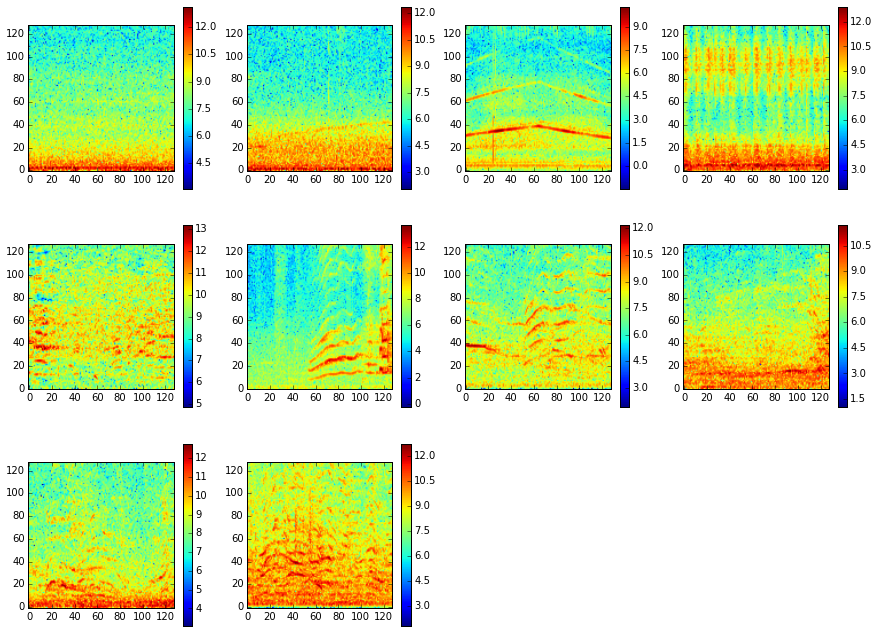

In [53]:
# plotting some
plt.figure(figsize=(15, 15))
idxs = np.random.randint(0, len(all_spec), 10)
for count, idx in enumerate(idxs):
    spec = all_spec[idx]
    plt.subplot(4, 4, count+1)
    plt.imshow(spec)
    plt.gca().invert_yaxis()
    print spec.shape
#     plt.clim(0, 5)/
    plt.colorbar()

In [54]:
# save unpadded spectrograms... as lists


In [55]:
Y = np.array([data['classID'][idx] for idx in data.index])
print Y.shape
print Y

(8732,)
[3 2 2 ..., 1 1 1]


In [56]:
del spec

In [60]:
def ismember(a, b):
    bind = {}
    for i, elt in enumerate(b):
        if elt not in bind:
            bind[elt] = i
    return np.array([1 if itm in bind else 0 for itm in a ]).astype(bool)


all_folds = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# create a folder fo this set of splits if it doesn't exist already
split_dir = base_path + 'splits_128/'

if not os.path.isdir(split_dir):
    os.mkdir(split_dir)
    
# save each fold into a pickle file
for test_fold in all_folds:
    
    val_fold = (test_fold) % 10 + 1
    
    train_folds = np.setdiff1d(all_folds, [test_fold, val_fold])
    
    print "Test fold: ", test_fold
    print "Validation folds: ", val_fold
    print "Train folds: ", train_folds
    print ""
    
    # sanity checks
    assert not np.intersect1d(train_folds, test_fold)
    assert not np.intersect1d(train_folds, val_fold)
    assert val_fold != test_fold

    # extract indices corresponding to each split
    train_idxs = ismember(all_fold_idxs, train_folds)
    test_idxs = all_fold_idxs == test_fold
    val_idxs = all_fold_idxs == val_fold

    # sanity check
    assert np.any(np.logical_and.reduce((
        train_idxs, test_idxs, val_idxs))) == 0

    # for each split, combine data...
    split = {}
    print len(all_spec)
    print train_idxs.shape
    split['train_X'] = [all_spec[idx] for idx in np.where(train_idxs)[0]]
    split['test_X'] = [all_spec[idx] for idx in np.where(test_idxs)[0]]
    split['val_X'] = [all_spec[idx] for idx in np.where(val_idxs)[0]]
    split['train_y'] = Y[train_idxs]
    split['test_y'] = Y[test_idxs]
    
    split['val_y'] = Y[val_idxs]
    
    split_savepath = split_dir + 'split' + str(test_fold) + '.pkl'
    pickle.dump(split, open(split_savepath, 'w'), -1)
    

Test fold:  1
Validation folds:  2
Train folds:  [ 3  4  5  6  7  8  9 10]

8732
(8732,)
Test fold:  2
Validation folds:  3
Train folds:  [ 1  4  5  6  7  8  9 10]

8732
(8732,)
Test fold:  3
Validation folds:  4
Train folds:  [ 1  2  5  6  7  8  9 10]

8732
(8732,)
Test fold:  4
Validation folds:  5
Train folds:  [ 1  2  3  6  7  8  9 10]

8732
(8732,)
Test fold:  5
Validation folds:  6
Train folds:  [ 1  2  3  4  7  8  9 10]

8732
(8732,)
Test fold:  6
Validation folds:  7
Train folds:  [ 1  2  3  4  5  8  9 10]

8732
(8732,)
Test fold:  7
Validation folds:  8
Train folds:  [ 1  2  3  4  5  6  9 10]

8732
(8732,)
Test fold:  8
Validation folds:  9
Train folds:  [ 1  2  3  4  5  6  7 10]

8732
(8732,)
Test fold:  9
Validation folds:  10
Train folds:  [1 2 3 4 5 6 7 8]

8732
(8732,)
Test fold:  10
Validation folds:  1
Train folds:  [2 3 4 5 6 7 8 9]

8732
(8732,)


In [58]:
print len([all_spec[idx] for idx in train_idxs])
print train_idxs.shape
print test_idxs.shape

8732
(8732,)
(8732,)


In [59]:
for key, val in split.iteritems():
    print val.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# now let's do lasagne!
# Or maybe save the train/test folds to disk?
128 / 8